Mean Squared Error: 45173046132.79021
R-squared: 0.7011904448878409


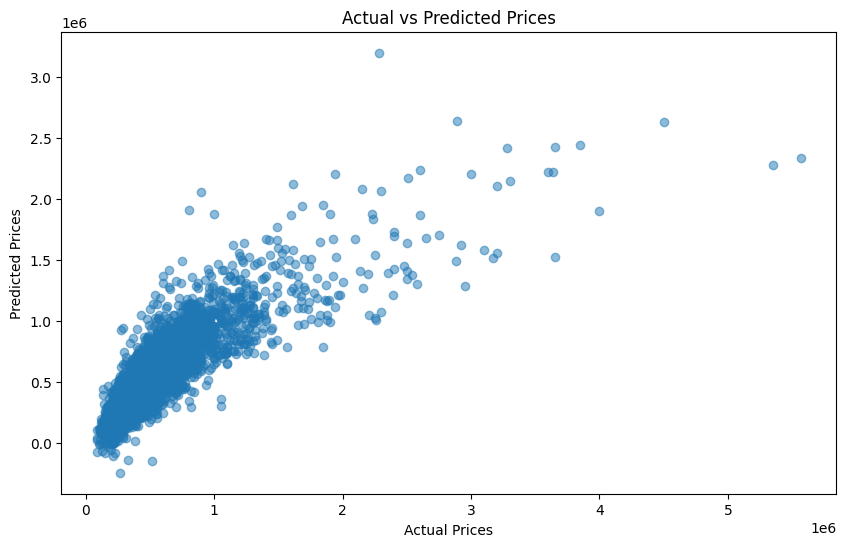

Testing dataset
         id                 date   price  bedrooms  bathrooms  sqft_living   
0  99999999  2014-10-13T00:00:00  450000         3        2.5         1900  \
1  99999998  2014-12-05T00:00:00  890000         4        3.5         3800   
2  99999997  2015-02-23T00:00:00  350000         2        1.5         1200   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement   
0      6000       2           0     0  ...      7        1600            300  \
1      8000       2           0     3  ...     10        3300            500   
2      3000       1           0     0  ...      6        1200              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15   
0      1995             0    98178  47.5112 -122.257           1700  \
1      2001             0    98052  47.6392 -122.129           3500   
2      1985             0    98188  47.4894 -122.224           1400   

   sqft_lot15  
0        5000  
1        7000  
2        4000  



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('home.csv')

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Drop 'id' column
df = df.drop(['id', 'date'], axis=1)

# Define features and target variable
X = df.drop('price', axis=1)  # Features
y = df['price']               # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting the real vs predicted prices
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Create a sample test dataset
print("Testing dataset")
test_data = {
    'id': [99999999, 99999998, 99999997],
    'date': ['2014-10-13T00:00:00', '2014-12-05T00:00:00', '2015-02-23T00:00:00'],
    'price': [450000, 890000, 350000],
    'bedrooms': [3, 4, 2],
    'bathrooms': [2.5, 3.5, 1.5],
    'sqft_living': [1900, 3800, 1200],
    'sqft_lot': [6000, 8000, 3000],
    'floors': [2, 2, 1],
    'waterfront': [0, 0, 0],
    'view': [0, 3, 0],
    'condition': [3, 5, 4],
    'grade': [7, 10, 6],
    'sqft_above': [1600, 3300, 1200],
    'sqft_basement': [300, 500, 0],
    'yr_built': [1995, 2001, 1985],
    'yr_renovated': [0, 0, 0],
    'zipcode': [98178, 98052, 98188],
    'lat': [47.5112, 47.6392, 47.4894],
    'long': [-122.257, -122.129, -122.224],
    'sqft_living15': [1700, 3500, 1400],
    'sqft_lot15': [5000, 7000, 4000]
}

test_df = pd.DataFrame(test_data)

# Save to CSV
test_df.to_csv('house_test_data.csv', index=False)

# Display the test dataset
print(test_df)

# Load the test dataset
test_df = pd.read_csv('house_test_data.csv')

# Convert 'date' to datetime
test_df['date'] = pd.to_datetime(test_df['date'])

# Drop 'id' and 'date' columns
test_df = test_df.drop(['id', 'date'], axis=1)

# Define features and target variable
X_test = test_df.drop('price', axis=1)  # Features
y_test = test_df['price']               # Target variable

# Make predictions on the test dataset
y_pred = model.predict(X_test)

# Evaluate the model on the test dataset
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Test Mean Squared Error: {mse}')
print(f'Test R-squared: {r2}')

# Display the predictions along with actual prices
predictions_df = test_df.copy()
predictions_df['Actual Price'] = y_test
